<a href="https://colab.research.google.com/github/RASHI2505/Minor-Project/blob/main/Heart_Attack_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#======================================
#**HEART ATTACK ANALYSIS AND PREDICTION**
#======================================

DATA SOURCE: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

**FEATURES:**

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [243]:
import os
os.listdir()

['.config', 'heart.csv', 'sample_data']

In [244]:
!pip install plotly matplotlib seaborn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [245]:
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [246]:
df= pd.read_csv("heart.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [247]:
df.info()
#checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



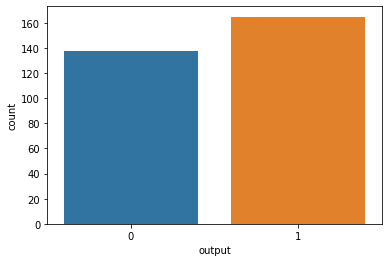

In [248]:
sns.countplot(df.output)

In [249]:
px.histogram(df, x='age', color='output', title='Age vs Output')

In [250]:
fig = px.pie(df, values='sex', names='output', title='Gender vs Output', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



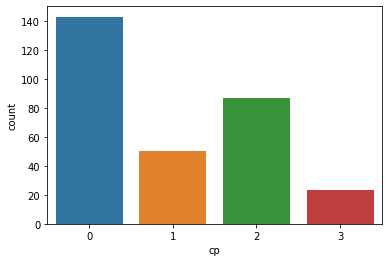

In [251]:
# px.scatter(df, x='cp', color='output')
sns.countplot(df.cp)

In [252]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Text(0.5, 1.0, 'CORRELATION MATRIX')

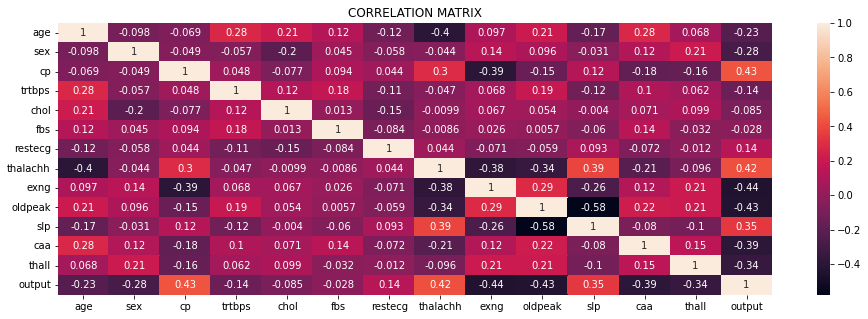

In [253]:
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(), annot=True)
plt.title('CORRELATION MATRIX')

#Train, Test and Validation Sets

In [254]:
from sklearn.model_selection import train_test_split

In [255]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [256]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (181, 14)
val_df.shape : (61, 14)
test_df.shape : (61, 14)


#Separating Input and Target Columns

In [257]:
input_cols = list(train_df.columns)[0:-1]
target_col = 'output'

In [258]:
print(input_cols)

['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']


In [259]:
target_col

'output'

In [260]:
train_inputs = pd.DataFrame(train_df[input_cols]).copy()
train_targets = pd.DataFrame(train_df[target_col]).copy()

In [261]:
val_inputs = pd.DataFrame(val_df[input_cols]).copy()
val_targets = pd.DataFrame(val_df[target_col]).copy()

In [262]:
test_inputs = pd.DataFrame(test_df[input_cols]).copy()
test_targets = pd.DataFrame(test_df[target_col]).copy()

In [263]:
train_targets

,output
133,1
277,0
151,1
210,0
136,1
...,...
35,1
114,1
83,1
14,1


In [264]:
val_inputs

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2


#Numeric and Categorical Columns

In [265]:
import numpy as np

In [266]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [267]:
numeric_cols

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall']

In [268]:
categorical_cols

[]

In [269]:
train_inputs[numeric_cols].describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,54.425414,0.674033,0.911602,129.475138,250.093923,0.132597,0.546961,149.569061,0.320442,1.039227,1.419890,0.602210,2.298343
std,9.409287,0.470035,1.007157,15.874707,55.237940,0.340079,0.541863,21.937587,0.467941,1.125541,0.624003,0.923036,0.595770
min,29.000000,0.000000,0.000000,94.000000,149.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,137.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,163.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000,4.000000,3.000000


# Imputing Missing Values

In [270]:
from sklearn.impute import SimpleImputer

In [271]:
imputer = SimpleImputer(strategy = 'mean')
df[numeric_cols].isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
dtype: int64

In [272]:
imputer.fit(df[numeric_cols])


SimpleImputer()

In [273]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])


In [274]:
train_inputs[numeric_cols].isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
dtype: int64

# Scaling the Numerical Features

In [275]:
# from sklearn.preprocessing import MinMaxScaler

In [276]:
# scaler = MinMaxScaler()
# scaler.fit(df[numeric_cols])

In [277]:
# train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
# val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
# test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [278]:
# train_inputs[numeric_cols].describe()

#Training Logistic Regression Model

In [279]:
from sklearn.linear_model import LogisticRegression

In [280]:
model = LogisticRegression (solver= 'liblinear')

In [281]:
model.fit(train_inputs[numeric_cols], train_targets)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(solver='liblinear')

In [282]:
print(model.coef_.tolist())
#weight of each feature on target

[[0.005447010391744801, -1.253536230652252, 0.9451855873055979, -0.015879774133551496, -0.004978458347026939, 0.056448475044615996, 0.511213784236135, 0.03152541042168826, -0.7988481862253202, -0.4128066834966554, 0.7571761649925614, -0.9641097513186112, -0.775566726683119]]


In [283]:
n = len(model.coef_.tolist())

weight_df = pd.DataFrame({
    'feature' : (numeric_cols),
    'weight' : model.coef_.tolist()[0]
})

#to represent in 2 dimensional array

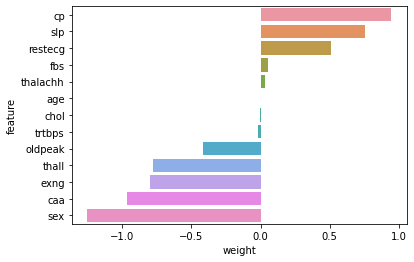

In [284]:
sns.barplot(data= weight_df.sort_values('weight', ascending=False).head(20), x='weight', y='feature')

In [285]:
model.score(train_inputs[numeric_cols], train_targets)

0.8674033149171271

In [286]:
model.score(val_inputs[numeric_cols], val_targets)


0.8032786885245902

In [287]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



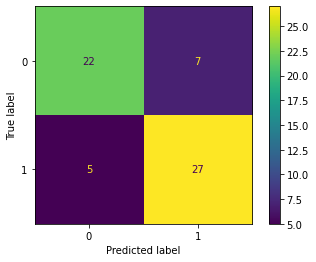

In [288]:
plot_confusion_matrix(model, val_inputs[numeric_cols], val_targets)  
plt.show()

#Training and Visualizing Decision Trees 

In [289]:
from sklearn.tree import DecisionTreeClassifier

In [290]:
model = DecisionTreeClassifier(max_depth= 10, random_state=42)

In [291]:
model.fit(train_inputs[numeric_cols], train_targets)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [292]:
model.score(train_inputs[numeric_cols], train_targets)

1.0

In [293]:
model.score(val_inputs[numeric_cols], val_targets)

0.7704918032786885

In [294]:
from sklearn.tree import plot_tree, export_text

[Text(0.5, 0.875, 'cp <= 0.5\ngini = 0.493\nsamples = 181\nvalue = [80, 101]'),
 Text(0.25, 0.625, 'caa <= 0.5\ngini = 0.404\nsamples = 89\nvalue = [64, 25]'),
 Text(0.125, 0.375, 'exng <= 0.5\ngini = 0.5\nsamples = 43\nvalue = [21, 22]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'trtbps <= 109.0\ngini = 0.122\nsamples = 46\nvalue = [43, 3]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'oldpeak <= 2.45\ngini = 0.287\nsamples = 92\nvalue = [16, 76]'),
 Text(0.625, 0.375, 'chol <= 228.0\ngini = 0.238\nsamples = 87\nvalue = [12, 75]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'trtbps <= 131.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

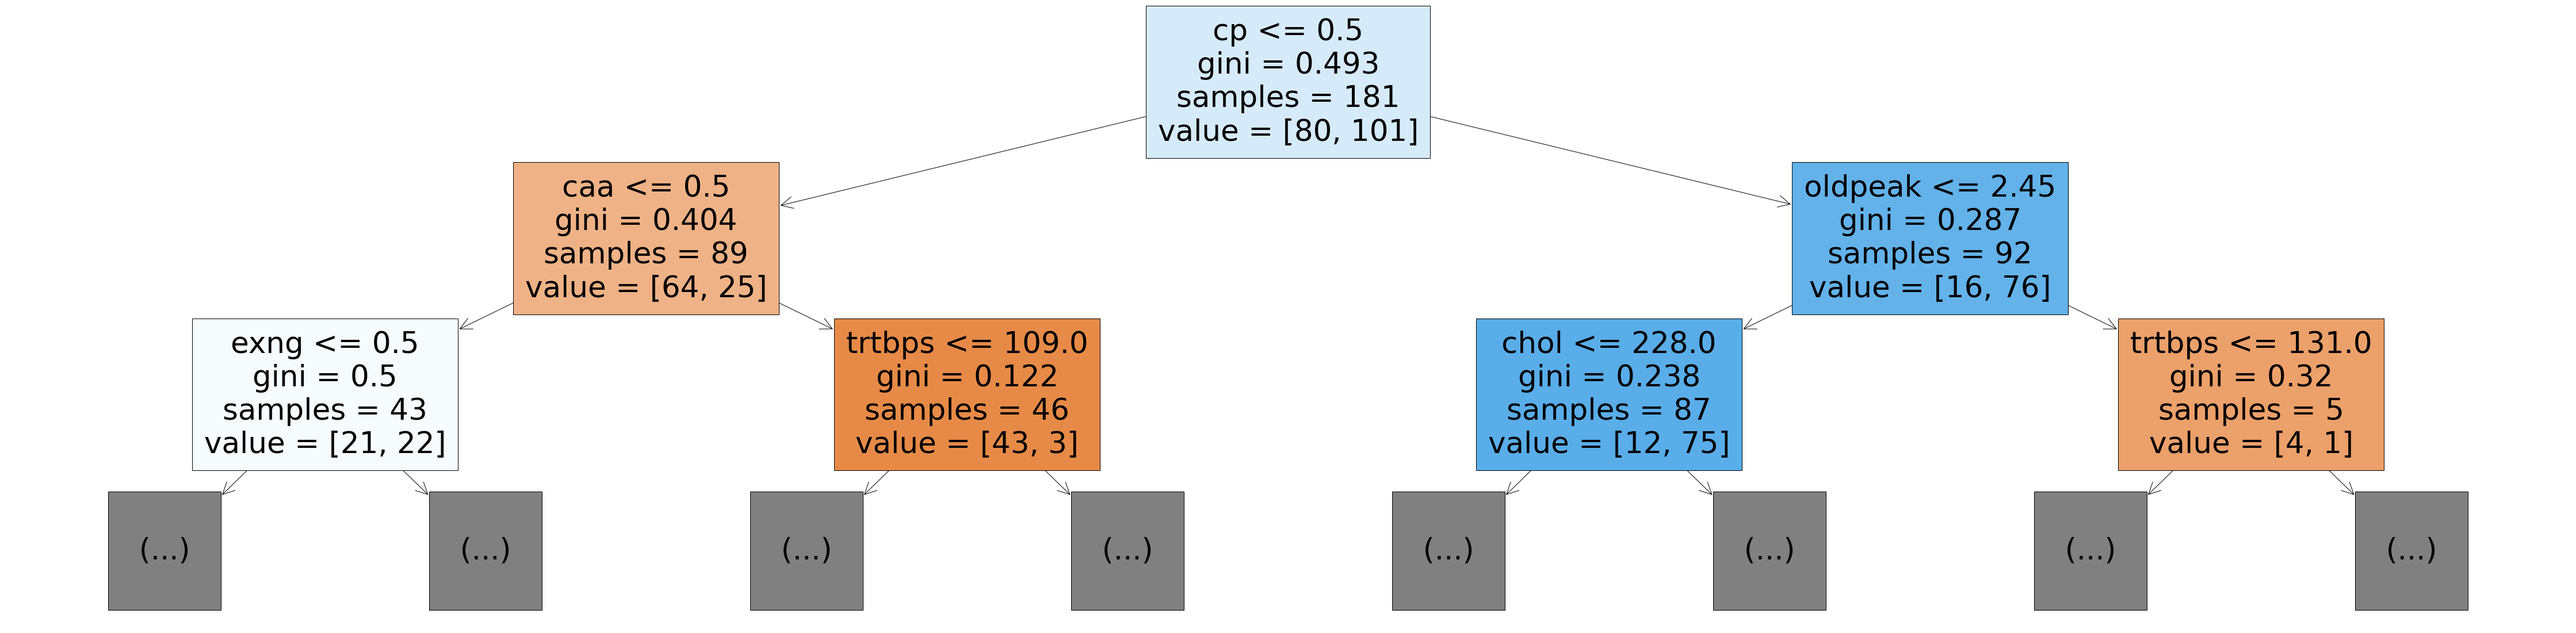

In [295]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=train_df.columns, max_depth=2, filled=True)

In [296]:
model.tree_.max_depth

10

# Random Forest Classifier

In [297]:
from sklearn.ensemble import RandomForestClassifier

In [298]:
model=RandomForestClassifier(n_jobs=-1, random_state=42)
model.fit(train_inputs[numeric_cols], train_targets)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(n_jobs=-1, random_state=42)

In [299]:
model.score(train_inputs[numeric_cols], train_targets)

1.0

In [300]:
model.score(val_inputs[numeric_cols], val_targets)

0.7704918032786885

# Support Vector Machine

In [301]:
from sklearn.svm import SVC

In [302]:
classifier=SVC(kernel='linear', random_state=42)

In [303]:
classifier.fit(train_inputs[numeric_cols], train_targets)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(kernel='linear', random_state=42)

In [304]:
classifier.score(train_inputs[numeric_cols], train_targets)

0.8729281767955801

In [305]:
classifier.score(val_inputs[numeric_cols], val_targets)

0.7868852459016393